# Recursion

Recall - A recursive function is divided into oneor  more base cases and one or more recursive or inductive cases. Together, these have a very standard structure. In pseudocode, it looks like:

In [ ]:
def recursive_function(value):
    """Always check base cases first"""
    if base case applies:
        do the base case and return
    elif another base case applies:
        do the base case and return
    else:
        """Recursive case(s) follow"""
        break value into pieces p1, p2, ...
        result1 = recursive_function(p1)
        result2 = recursive_function(p2)
        ...
        return combine(result1, result2, ...)

For example, the classic recursive factorial function can be written as a method in a class:

In [1]:
def classic_factorial(value:int) -> int:
    """We always check base cases first"""
    if value < 2:
        return 1
    else:
        """Recursive cases follow"""
        p1 = value - 1
        r1 = classic_factorial(p1)
        return value * r1

Which could typically simplify to:

In [2]:
def fact(value:int) -> int:
    if value < 2:
        return 1
    return value * fact(value - 1)

we can see the same basic structure in a binary search. Suppose we have a sorted table of (key, value) pairs that looks like this:

In [14]:
table = [(1, "alpha"), (3, "beta"), (4, "gamma"), (9, "delta"), (12, "epsilon")]

The table is sorted by key. We can search it like this:

In [15]:
def bin_search(key: int, table: list[tuple[int, str]]) -> [str]:
    return bin_search_range(key, table, 0, len(table) - 1)

def bin_search_range(key: int, table: list[tuple[int, str]], low: int, high: int) -> [str]:
    """Recursive binary search in range low..high inclusive."""

    """Base case 1: key not in table"""
    if low > high:
        return "No such value"
    
    mid = (high + low) // 2
    entry_key, entry_value = table[mid]

    """base case 2: Key found at midpoint in table"""
    if entry_key == key:
        return entry_value
    
    if key < entry_key:
        """Revursive case 1: Key must be before midpoint, or absent"""
        return bin_search_range(key, table, low, mid - 1)
    
    else:
        """Recursive case 2: Key must be after midpoint, or absent"""
        return bin_search_range(key, table, mid + 1, high)

# Recursive Data Structures:

A data structure can also have a recursive structure: Tuples can contain tuples, lists can contain lists, and so on. Instead of a simple list, we can make the table have four elements:

[key], [value], [smaller_key], [larger_keys]

where smaller keys and larger keys are themselves tables with the same form, lists within lists,s o that we get a tree-like structure. This is called a binary search tree, because each node has two branches, one for smaller keys and one for larger keys.

In python, this table could be represented as:

In [16]:
alpha_tree: [4, "gamma",
             [3, "beta",
              [1, "alpha", [],[]],
              []],
            [12, "epsilon",
             [9, "delta", [], []],
             [15, "zeta", [], []]]
           ]

typically,wev  isualize this structure not by drawing list cells within list cells,b ut by drawing "nested in" relation as lines. We call such a structure a tree, with the root of the tree at the top. 

- Each entry of the tree is called a node. 
- The top node is called the root.
- The nodes at the bottom of the tree are called leaves.
- The nodes in between are called internal nodes, and each of those + all the leaf nodes have a parent node.

Here, key 4 is at the root, Keys 1, 9, and 15 are in leaves,and  4, 3, and 12 are internal nodes. 

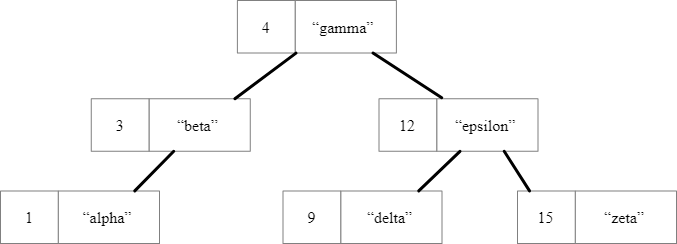

we can now rewrite our binary search as a search in the nested list structure, or tree:

In [17]:
def nested_list_search(key: int, table: list) -> str:
    """Table is [key, value, smaller keys, larger keys]"""
    log.debug(f"search for {key} in {table}")
    """Base case one: there are no keys"""
    if table == []:
        return "no such value"
    
    entry_key, entry_value, smaller, larger = table
    """Base case two: key is found"""
    if key == entry_key:
        return entry_value
    
    if key < entry_key:
        """Recursive case one: Must be in the smaller keys"""
        return nested_list_search(key, smaller)
    else:
        """Recursive case 2: must be  in the larger keys"""
        return nested_list_search(key, larger)

notice - this is almost the same logica s our binary search in a list. The differences are now the data is shaped like an algorithm. When we searched a sorted list, we divided the list into a middle element, a sublist of smaller elements, and a sublist of larger elements. The nested list has already been divided up into a middle element (Which appears in the first key and value), a sublist of smaller elements, and a sublist of larger elements. Instead of calculating a midpoint, our `nested_search_list` just follows the data structure.

# Hierarchical Structures as Classes

We can implement the same logical structure using classes and objects! Note that when we represented the tree using nested lists, we used empty lists to to represent emptyse ts of entries with larger or smaller keys. Using classes, we can instead create a distinct subclass for an empty table.

We'll create an abstract base class for the tree structure, with a concrete subclass for a non-empty node, and a concrete subclass for an empty node.

In [18]:
class GreekSearchTree:
    """An abstract base class for the table of Greek Letters"""
    def __init__(self):
        raise NotImplementedError("Nope, can't do that.")

class Node(GreekSearchTree):
    def __init__(self, key: int, value: str, smaller: GreekSearchTree, larger: GreekSearchTree):
        self.key = key
        self.value = value
        self.smaller = smaller  
        self.larger = larger 

class Empty(GreekSearchTree):
    def __init__(self):
        pass

with this, we can build up the tree structure:

In [19]:
# the leaves
empty = Empty() # the empty tree - we only need one of these.
alpha = Node(1, "alpha", empty, empty)
delta = Node(9, "delta", empty, empty)
zeta = Node(15, "zeta", empty, empty)

#the internal nodes
beta = Node(3, "beta", alpha, empty)
epsilon = Node(12, "epsilon", delta, zeta)
gamma = Node(4, "gamma", beta, epsilon)

# the root (4, gamma)
tree = gamma

let's implement a search method - in the abstract base class, we will give a method definition with the header for the search method.

In [20]:
class GreekSearchTree:
    """an abstract base class for the table of Greek Letters"""

    def __init__(self):
        raise NotImplementedError("Nope, can't do that.")
    
    def search(self, key: int) -> str:
        """Return associated string or 'No such Value'"""
        raise NotImplementedError("Concrete classes must override the search method")

we will override that search method for the non-empty node class:

In [21]:
class Node(GreekSearchTree):
    def __init__(self, key: int, value: str, smaller: GreekSearchTree, larger: GreekSearchTree):
        self.key = key
        self.value = value
        self.smaller = smaller
        self.larger = larger

    def search(self, key) -> str:
        if self.key == key:
            return self.value
        if key < self.key:
            return self.smaller.search(key)
        else:
            return self.larger.search(key)

in this `search` method, we see one of the base cases (where the key is found) and the recursive cases for searching in the subtree of smaller keys or thesu btree of larger keys. But where is the other base case?

The other case is not in this class at all, but is rather in the `search` method of the other concrete class:

In [22]:
class Empty(GreekSearchTree):
    def __init__(self):
        pass

    def search(self, key) -> str:
        return "No such value"

Here, we see the one big difference between recursive functions and recursion in methods in a recusrsive structure of objects.

In the function, we always used some kind of decision( usually an `if` statement) to distinguish the base cases and the recursive cases. 

Typically, the cases are distributed among different subclasses, and part or all of the choice of which cases to execute are controlled by which kind of object the method is called in.

Let's consider an example search for key 10.
initially, we call the 'search' method on the root object, with key 4. 

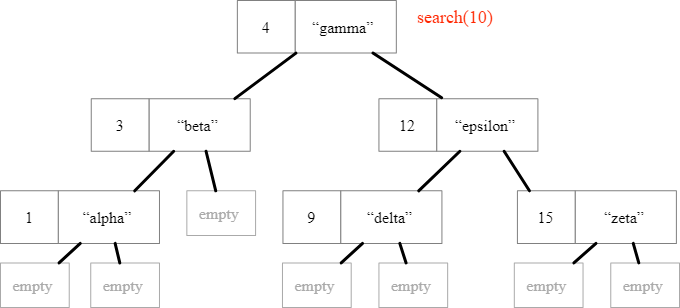

the key 10 is greaterthan the key inth at node, so the recursive part of the `search` method is invoked on `self.larger`, which is the subtree with key 12 at its root.

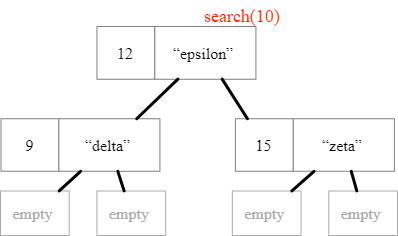

Now key 10 is smaller than the key in the node, so it makes a recursive call to `self.smaller.search(key)`.

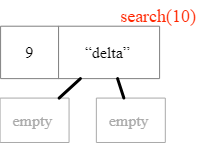

Now key 10 is larger than the key in the node, so once again it makes a recursive call on `self.larger.search(key)`.

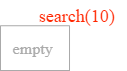

This time, we get the method `search` with class `Empty`. We don't have to usean `if` statement to determine that this is a base case. We know it is a base case because that is the only case that this `Empty` node could be asked to handle!

# other recursive structures and methods

*search trees*,like the table illustrated above,are one important group of tree structures in software, but not the only one. Often, trees represent hierarchical "part-of" structures.  (country comprised of states or provinces, states made up of counties, counties further divided into precincts), graphics (a scene made up of shapes, with composite shapes and made up of simpler shapes, and simple line segments, points, and polygons as leaf nodes), documents (a book made up of chapters, chapters made up of sections, sections made up of paragraphs, paragraphs made up of lines) and so on. There is hardly an application domain in which tree structures do not find some use in software.

Wherever we find trees, we are likely to find some methods that *walk* or *traverse* the trees recursively. Sometimes these are some form of search, but not always. Many of the functions we might write for a list are also needed for trees. With a list, we might have a choice between recursion and a simple loop.

For example, the recursive binary search of a list could also be written without recursion, using a loop.

The loop version of a binary search is hardly more complex than the recursive version, and apt to execute a little faster. With tree structures, on the other hand, recursion is usually the better choice.

One widely used tree structure you may have already seen is the DOM of HTML. This is the datas tructure that a web browser constructs of constructs from the html source code of a web page, and it is the structure that style sheets and scripts consume and manipulate to support all interactive effects of modern web apps.

Consider a very simplified version of the DOM structure. Each "..." segment would be represented by a node in the tree. Content that is plain text, with no tags, might be leaf nodes. We would begin with an abstract base class for DOM tree nodes:

In [23]:
class DOMNode:
    """Abstract base class, defines the interface that concrete DOM node classes must conform to."""
    def __init__(self):
        raise NotImplementedError("Abstract constructor of DOMNode")

We might define several other methods that all DOM nodes should implement, but for the example we'll consider only the simple magic methods like `__str__`, which we've inherited already from class `object`.

The internal nodes of the DOM have tags (like `h1`, `h2` etc. for "header" elements and `p` for paragraphs). These tagged sections may be nested. This is represented by giving each node a list of children. (Contrast this to our search tree, in which each internal node had exactly two children.)

In [24]:
class Tagged(DOMNode):
    def __init__(self, tag: str, children: list[DOMNode] = []):
        self.tag = tag
        self.children = children

    def append(self, node:DOMNode):
        self.children.append(node)

How shall we define the __str__ method for a tagged node? Let’s make it look like html, in which begin-tags like <//p> are paired with end-tags like <//p>. Ignore two slashes on first p and one on second. - John note-  just for markdown formatting.

In [25]:
def __ste__(self) -> str:
    """Text form is like HTML source code"""
    parts = [str(part) for part in self.children]
    return f"<{self.tag}> {''.join(parts)} </{self.tag}>\n"

notice that the `_str_` method uses f-strings that implicitly make calls on the __str__ methods of the children of a `Tagged` node. Thus, producing the text for a DOM tree is recursive.

Plain text nodes, which will always be leaves of the DOM, will be simple: 

In [26]:
class Plain(DOMNode):
    """Plain text content is essentially just a string"""

    def __init__(self, text: str):
        self.text = text

    def append(self, text: str):
        self.text += text

    def __str__(self):
        return self.text

Where we have a recursive tree traversal, leaf node classes usually handle a base case. For creating a string representation, the __str__ methods implement a recursive walk over the tree, and we can see that the simple __str__ method of Plain is a base case.

Now we can build a DOM tree with calls to the constructors of Tagged and Plain:

In [27]:
page = Tagged("html",
              [Tagged("head", [Tagged("title", [Plain("My Tremendous Novel")])]),
               Tagged("body", [Tagged("h1", [Plain("A Tail of Two Mice")]),
                               Tagged("h2", [Plain("By Little Charley Dickie")]),
                               Tagged("p", [Plain("It was the worst of cats."),
                                            Plain("Like, really bad.  Unbelievably bad.")]),
                               Tagged("h3", [Plain("Copyright 2020 by L.C.D.")])
                               ])  # End of body
                ]) # End of document

If we print page, its __str__ method will be called, and the recursive __str__ calls will produce the following output:

In [28]:
 <html> <head> <title> My Tremendous Novel </title>
 </head>
 <body> <h1> A Tail of Two Mice </h1>
 <h2> By Little Charley Dickie </h2>
 <p> It was the worst of cats. Like, really bad.  Unbelievably bad </p>
 <h3> Copyright 2020 by L.C.D. </h3>
 </body>
 </html>

SyntaxError: invalid syntax (522238087.py, line 1)

# Summary:

The basic logic of recursion is the same for OOP as for recursive functions that do not involve classes and objects. Just as before, we must identify one or more base cases and one or more recursive cases. The base cases are the simplest cases that can be solved without recursion. The recursive cases are the cases that are solved by making a recursive call to the same method.

The key difference is that with classes and objects, the recursive structure of the algorithms is often the same as the recursive sturcture of the objects. 

Often, we will have the base case in one subclass and the recursive case in another subclass. Instead of writing an `if` statement to control which case applies, we just let each class take care of the part of the logic that belongs to it. Whena  leaf node and an internal node both have a method m, usually the method m in the leaf node class will handle only the base case, and the method m in the internal node class will handle only the recursive case.